In [4]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#para eigen face
from sklearn.decomposition import PCA
import pickle

In [5]:
ruta_fem = glob ('female_/*.jpg')
ruta_mas = glob ('male_/*.jpg')

In [6]:
print ('cantidad de fotos de mujeres=', len(ruta_fem))
print ('cantidad de fotos de hombres=', len(ruta_mas))

cantidad de fotos de mujeres= 3828
cantidad de fotos de hombres= 3161


[[121 115 410 410]]


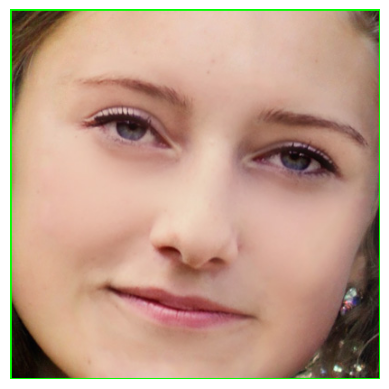

In [7]:
#leer y convertir en rgb
img = cv2.imread(ruta_fem[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# aplicar haar
haar =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
listado = haar.detectMultiScale(gray, 1.5,5)
print(listado)
for x,y,w,h in listado:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    #recortar
    roi = img_rgb[y:y+h, x:x+w]
    
    plt.imshow(roi)
    plt.axis('off')
    plt.show()

#cambiar a escala de grises

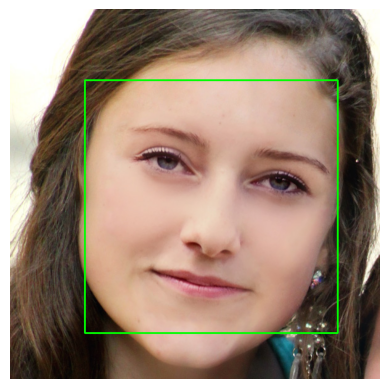

In [8]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [9]:
haar =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
for i in range(len(ruta_fem)):
    try:
                   
        img = cv2.imread(ruta_fem[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # aplicar haar

        gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        listado = haar.detectMultiScale(gray, 1.5,5)

        for x,y,w,h in listado:
            #recortar
            roi = img[y:y+h, x:x+w]
            cv2.imwrite(f'recortado/mujeres/mujer_{i}.jpg', roi)
    except:
        print('Error')
    

In [10]:
for i in range(len(ruta_mas)):
    try:
                   
        img = cv2.imread(ruta_mas[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # aplicar haar

        gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        listado = haar.detectMultiScale(gray, 1.5,5)

        for x,y,w,h in listado:
            #recortar
            roi = img[y:y+h, x:x+w]
            cv2.imwrite(f'recortado/hombres/hombre_{i}.jpg', roi)
    except:
        print('Error')

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#EStructurar las imagenes - ponerlas a un mismo tamaño
mujeres_dir = glob('recortado/mujeres/*.jpg')
hombres_dir = glob('recortado/hombres/*.jpg')

In [6]:
df_mujeres = pd.DataFrame(mujeres_dir, columns=['filepath'])
df_mujeres['genero']='mujer'

df_hombres = pd.DataFrame(hombres_dir, columns=['filepath'])
df_hombres['genero'] = 'hombre'

df = pd.concat ((df_mujeres, df_hombres),axis=0)
df.head()

,filepath,genero
0,recortado/mujeres\mujer_0.jpg,mujer
1,recortado/mujeres\mujer_1.jpg,mujer
2,recortado/mujeres\mujer_100.jpg,mujer
3,recortado/mujeres\mujer_1002.jpg,mujer
4,recortado/mujeres\mujer_1005.jpg,mujer


In [7]:
df.tail()

,filepath,genero
2187,recortado/hombres\hombre_994.jpg,hombre
2188,recortado/hombres\hombre_996.jpg,hombre
2189,recortado/hombres\hombre_997.jpg,hombre
2190,recortado/hombres\hombre_998.jpg,hombre
2191,recortado/hombres\hombre_999.jpg,hombre


In [8]:
df.shape

(4781, 2)

In [10]:
#encontrar el ancho de la imagen
def get_tamano (path):
    img = cv2.imread(path)
    return img.shape[0]

In [12]:
df['tamano'] = df['filepath'].apply(get_tamano)

In [13]:
df.head()

,filepath,genero,tamano
0,recortado/mujeres\mujer_0.jpg,mujer,273
1,recortado/mujeres\mujer_1.jpg,mujer,182
2,recortado/mujeres\mujer_100.jpg,mujer,122
3,recortado/mujeres\mujer_1002.jpg,mujer,122
4,recortado/mujeres\mujer_1005.jpg,mujer,182


In [14]:
distribucion_x_genero= df['genero'].value_counts()
distribucion_x_genero

mujer     2589
hombre    2192
Name: genero, dtype: int64

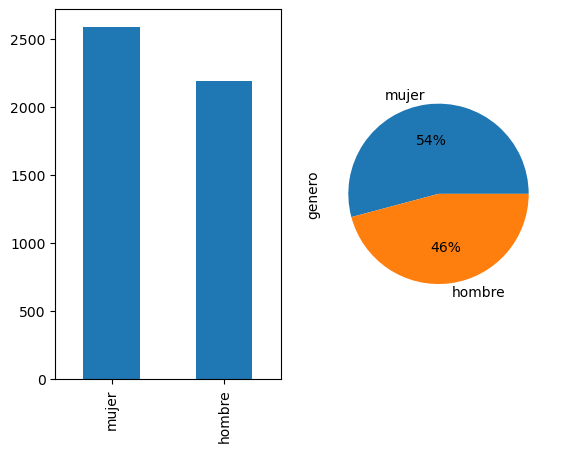

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=2)
distribucion_x_genero.plot(kind='bar', ax=ax[0])
distribucion_x_genero.plot(kind='pie', ax=ax[1], autopct='%0.0f%%')
plt.show()

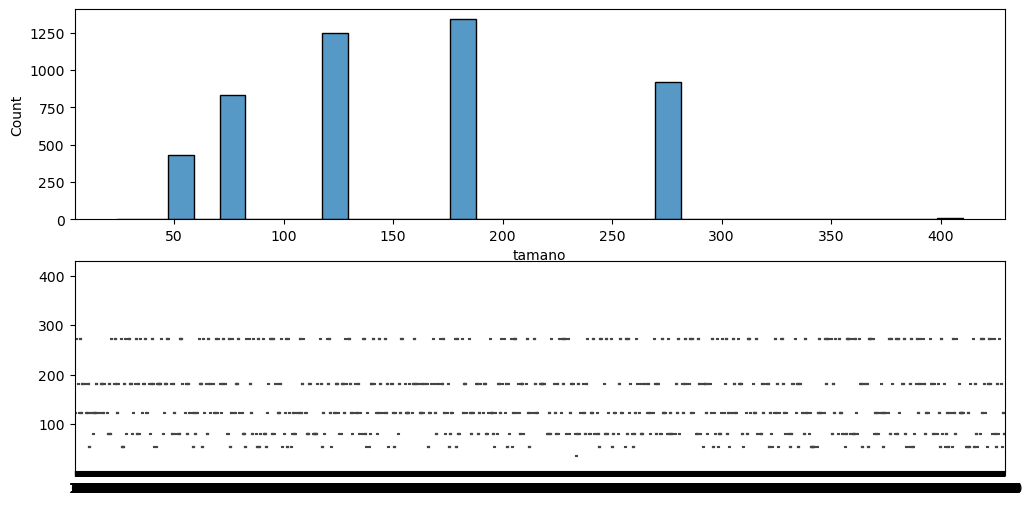

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['tamano'])
plt.subplot(2,1,2)
sns.boxplot(df['tamano'])
plt.show()

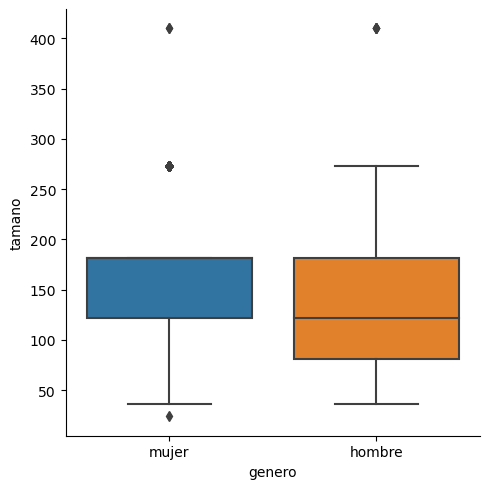

In [24]:
sns.catplot(data=df, x='genero', y='tamano', kind='box')

In [ ]:
#tenemos al menos igual distribucion por genero
#La mayoria de las imagenes tienen dimension mas que 60
#Las imagenes de mujeres son HD comparado con los hombres
#considerando las imagenes con tamaño mayor a 60, necesitamos redimensionar las imagenes a 100x100 

In [25]:
df_filtro = df.query('tamano > 60')

In [26]:
df_filtro.shape

(4343, 3)

In [40]:
df_filtro['genero'].value_counts(normalize=True)

mujer     0.54985
hombre    0.45015
Name: genero, dtype: float64

In [53]:
#cambiar las imagenes a 100x100
def modificar(path):
    try:
        img = cv2.imread(path)
        bn = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #aplicar inter_area(reducir) o inter_cubic (agrandar)
        tam = bn.shape[0]
        if tam >= 100:
            bn_nuevo =  cv2.resize(bn,(100,100), cv2.INTER_AREA)
        else:
            bn_nuevo = cv2.resize(bn,(100,100,), cv2.INTER_CUBIC)

        #cambiar
        img1 = bn_nuevo.flatten()
        return img1
    
    except:
        return None

In [52]:
#df_filtro['data'] = df_filtro['filepath'].apply(modificar)
#df_filtro['new_data'] = df_filtro['filepath'].apply(lambda x: modificar(x))
df_modified = df_filtro.copy()
df_modified['new_data'] = df_filtro['filepath'].apply(modificar)

In [54]:
df_modified.head()

,filepath,genero,tamano,data,new_data
0,recortado/mujeres\mujer_0.jpg,mujer,273,"[193, 194, 188, 194, 191, 182, 181, 188, 175, ...","[193, 194, 188, 194, 191, 182, 181, 188, 175, ..."
1,recortado/mujeres\mujer_1.jpg,mujer,182,"[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7...","[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7..."
2,recortado/mujeres\mujer_100.jpg,mujer,122,"[43, 43, 41, 53, 39, 31, 49, 58, 51, 57, 47, 4...","[43, 43, 41, 53, 39, 31, 49, 58, 51, 57, 47, 4..."
3,recortado/mujeres\mujer_1002.jpg,mujer,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,...","[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,recortado/mujeres\mujer_1005.jpg,mujer,182,"[233, 237, 232, 230, 231, 185, 142, 111, 52, 4...","[233, 237, 232, 230, 231, 185, 142, 111, 52, 4..."


In [55]:
datos = df_modified['data'].apply(pd.Series)

In [57]:
datos.columns = [f'pixel_{i}' for i in datos.columns]

In [59]:
#vamos a normalizar, dividiendo /255
datos = datos/255.0

In [60]:
datos['genero'] = df_modified ['genero']

In [61]:
datos.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,genero
0,0.756863,0.760784,0.737255,0.760784,0.749020,0.713725,0.709804,0.737255,0.686275,0.803922,...,0.415686,0.435294,0.454902,0.454902,0.466667,0.462745,0.462745,0.439216,0.431373,mujer
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,mujer
2,0.168627,0.168627,0.160784,0.207843,0.152941,0.121569,0.192157,0.227451,0.200000,0.223529,...,0.933333,0.890196,0.905882,0.901961,0.901961,0.917647,0.929412,0.937255,0.960784,mujer
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,mujer
4,0.913725,0.929412,0.909804,0.901961,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,mujer


In [62]:
#ver valores q no son utiles
datos.isnull().sum()

pixel_0       0
pixel_1       0
pixel_2       0
pixel_3       0
pixel_4       0
             ..
pixel_9996    0
pixel_9997    0
pixel_9998    0
pixel_9999    0
genero        0
Length: 10001, dtype: int64

In [63]:
#eliminar
datos.dropna(inplace=True)

In [64]:
datos.shape

(4343, 10001)

In [69]:
pickle.dump(datos, open('imagenes_100_x_100.pickle', mode='wb')) # guardamos los datos transformados 

In [70]:
#usar eigen face para extraer caracteristicas
datos_pickle = pickle.load(open('imagenes_100_x_100.pickle', mode='rb'))

In [71]:
datos_pickle.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,genero
0,0.756863,0.760784,0.737255,0.760784,0.749020,0.713725,0.709804,0.737255,0.686275,0.803922,...,0.415686,0.435294,0.454902,0.454902,0.466667,0.462745,0.462745,0.439216,0.431373,mujer
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,mujer
2,0.168627,0.168627,0.160784,0.207843,0.152941,0.121569,0.192157,0.227451,0.200000,0.223529,...,0.933333,0.890196,0.905882,0.901961,0.901961,0.917647,0.929412,0.937255,0.960784,mujer
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,mujer
4,0.913725,0.929412,0.909804,0.901961,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,mujer


In [72]:
#calcular el promedio de caras
x=datos_pickle.drop('genero', axis=1).values

In [73]:
x

array([[0.75686275, 0.76078431, 0.7372549 , ..., 0.4627451 , 0.43921569,
        0.43137255],
       [0.12156863, 0.09803922, 0.1372549 , ..., 0.1372549 , 0.25490196,
        0.0745098 ],
       [0.16862745, 0.16862745, 0.16078431, ..., 0.92941176, 0.9372549 ,
        0.96078431],
       ...,
       [0.69411765, 0.70196078, 0.70588235, ..., 0.61960784, 0.65098039,
        0.6745098 ],
       [0.14901961, 0.14509804, 0.14509804, ..., 0.23921569, 0.25490196,
        0.26666667],
       [0.71764706, 0.71764706, 0.7254902 , ..., 0.74509804, 0.74509804,
        0.74509804]])

In [74]:
promedio = x.mean(axis=0) #aplanamos el promedio

In [75]:
promedio.shape

(10000,)

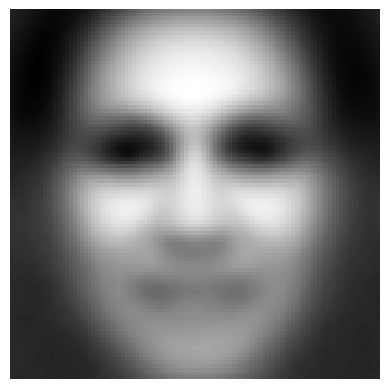

In [76]:
plt.imshow(promedio.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [77]:
#sustraer data con la cara promedio
x_t = x - promedio #transformando la data

In [79]:
#aplicar x_t a PCA -> encontrar el nro correcto de componentes
# Con el nro de componentes, procesar los principales componentes
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(x_t)

PCA(whiten=True)

In [80]:
exp_var_df= pd.DataFrame()
exp_var_df['aplanar']=pca.explained_variance_ratio_
exp_var_df['aplanar_var'] = exp_var_df['aplanar'].cumsum()
exp_var_df['principal'] = np.arange(1,len(exp_var_df)+1)
exp_var_df.head()

,aplanar,aplanar_var,principal
0,0.249768,0.249768,1
1,0.113995,0.363764,2
2,0.106123,0.469886,3
3,0.052557,0.522443,4
4,0.033418,0.555861,5


In [81]:
exp_var_df.set_index('principal', inplace=True)

<Axes: xlabel='principal'>

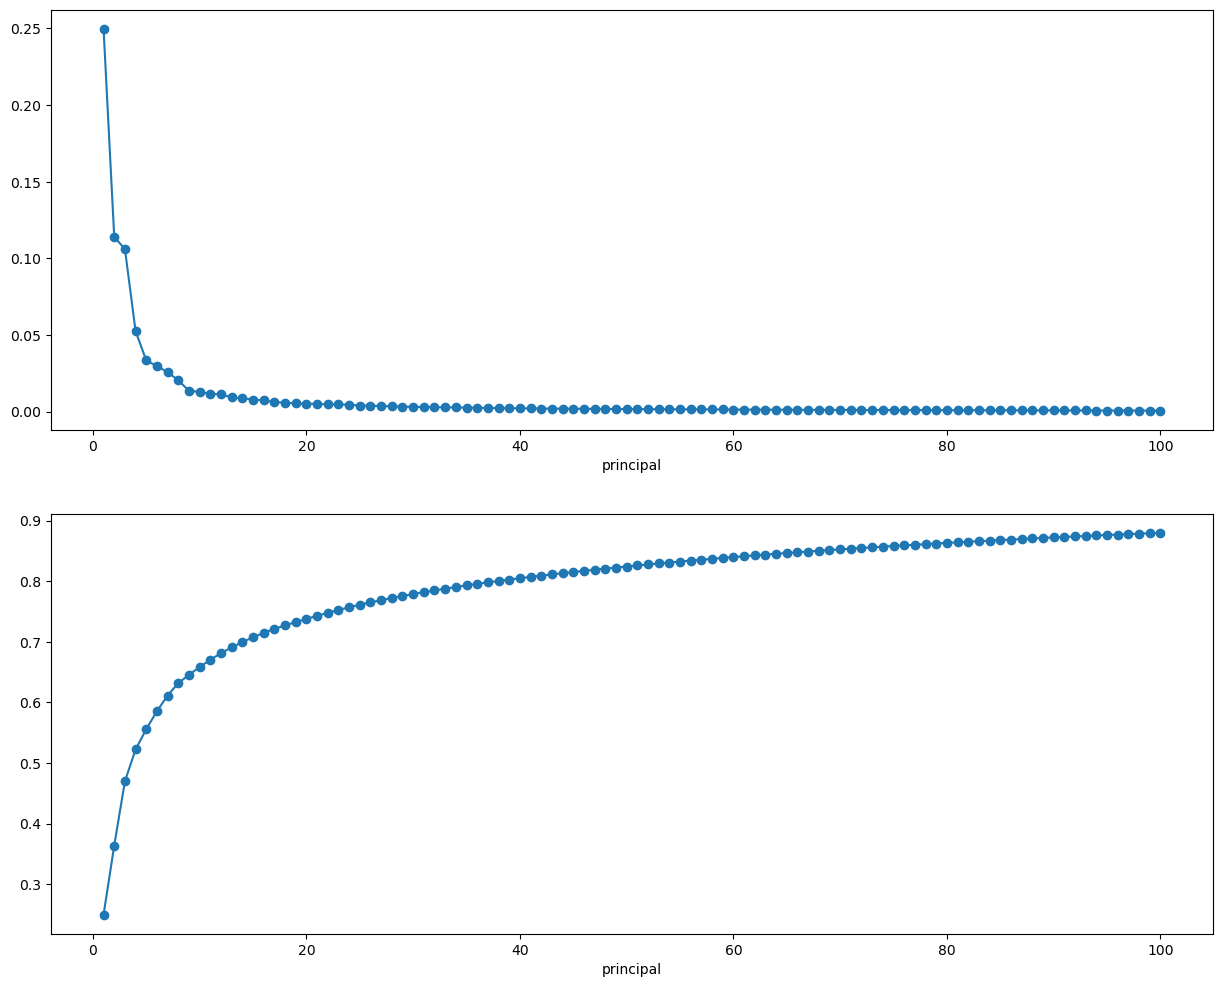

In [86]:
#ver la varianza
fig, ax = plt.subplots(nrows=2, figsize=(15,12))
exp_var_df['aplanar'].head(100).plot(kind='line', marker='o', ax=ax[0])
exp_var_df['aplanar_var'].head(100).plot(kind='line', marker='o', ax=ax[1])

In [87]:
#segun la imagen 2 vemos que la varianza se mantiene a partir de 0.8, que en el eje x estaria alrrededor de 50 => necesitamos explicar que es PCA y porque se usa aqui
pca_50 = PCA (n_components=50, whiten=True,svd_solver='auto')
pca_datos = pca_50.fit_transform(x_t)

In [88]:
pca_datos.shape

(4343, 50)

In [89]:
#guardamos nuestros pca_datos
y = datos['genero'].values #variable indep
np.savez('datos_pca_50', pca_datos, y)

In [90]:
#guardar el modelo
pca_dict = {'pca':pca_50, 'promedio':promedio}

In [91]:
pickle.dump(pca_dict, open('pca_dict.pickle','wb')) #aqui tenemos nuestro diccionario

In [92]:
#***************como visualizar eigen imagenes************************
pca_datos.shape

(4343, 50)

In [93]:
#invertir la transformacion
pca_datos_inv =  pca_50.inverse_transform (pca_datos)

In [94]:
pca_datos_inv.shape # aqui vemos que tienen 10000 pixels

(4343, 10000)

In [95]:
eig_img = pca_datos_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

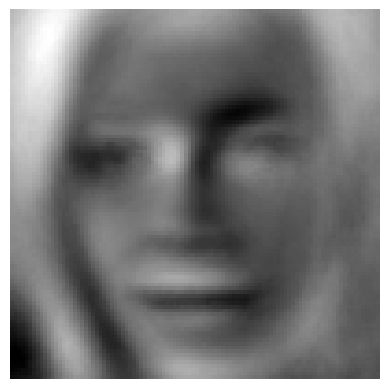

In [96]:
plt.imshow(eig_img, cmap='gray')
plt.axis('off')

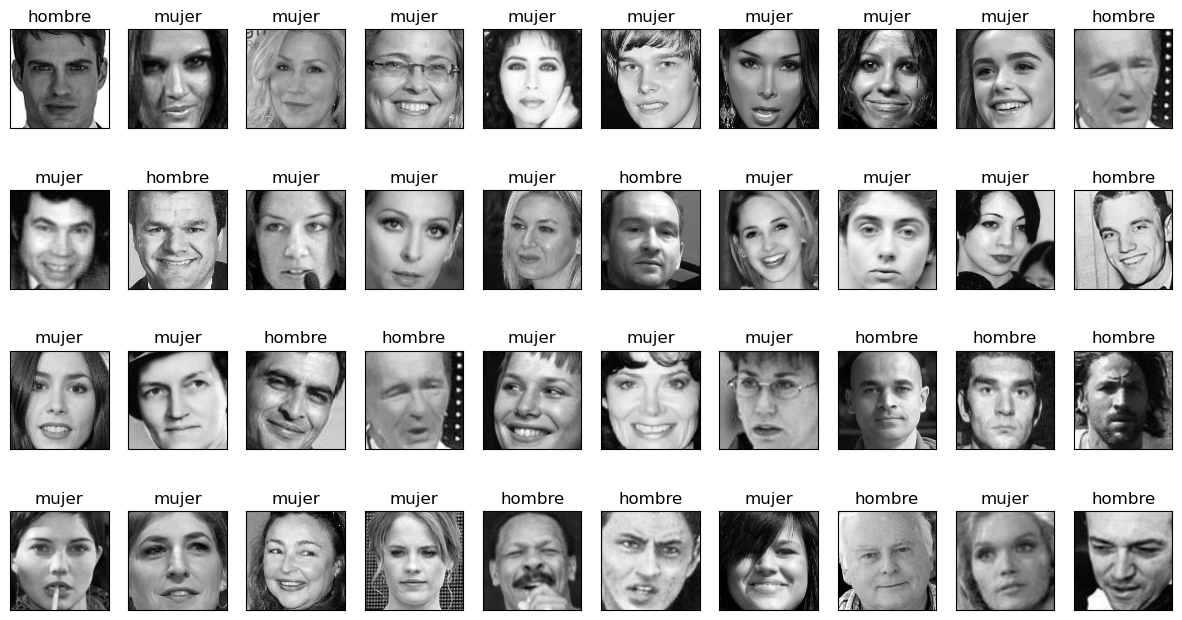

====================Eigen Imagen====================


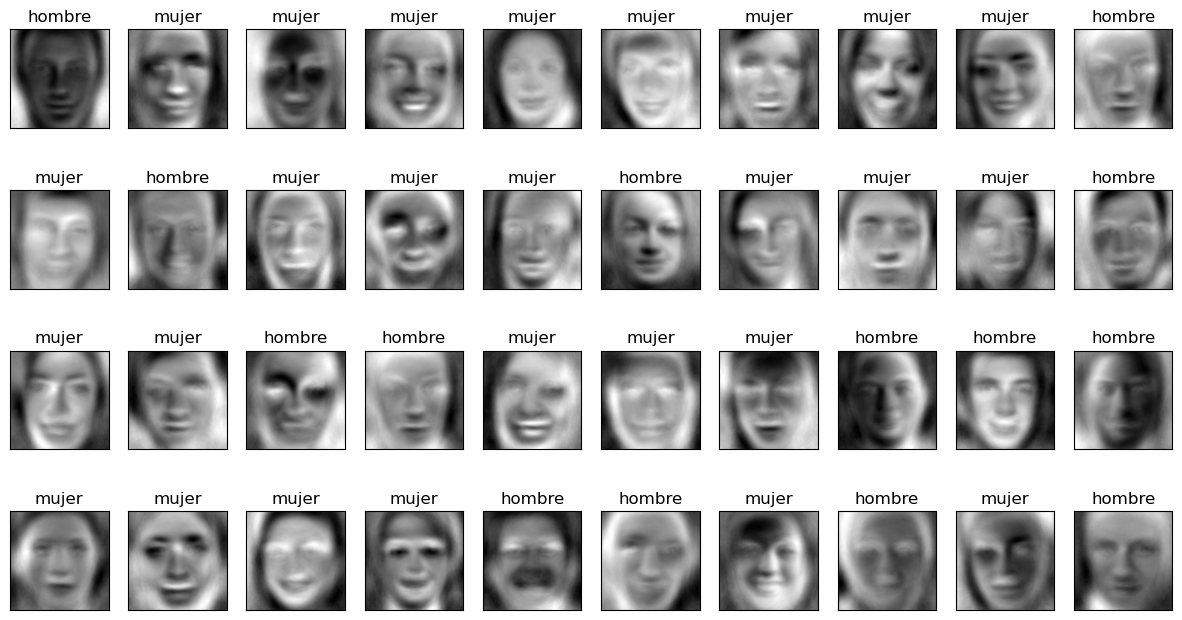

In [97]:
#teniendo 4343 imagenes...
np.random.seed(1001)
pics = np.random.randint (0,4319,40)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img =  x[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Imagen'+"="*20)
plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_datos_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()